In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

In [3]:
df = pd.read_excel("C:/Users/DELL/OneDrive/Documents/Python Scripts/dataset/online_retail_II.xlsx", sheet_name=0)


# EDA

Context: |Price| in : British Pounds

In [4]:
print(df.head(10))

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate                Price          Customer ID  \
0 2009-12-01 07:45:00                 6.95             13085.00   
1 2009-12-01 07:45:00                 6.75             13085.00   
2 2009-12-01 07:45:00       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


NOTICE:\\
<InvoiceDate> : already in datetime64 format > save the time of converting
all 6 variables: in good types, altho can be optimised
memory usage: 32+ MB > quite high but still handle-able


In [6]:
# High level statistics summary of the dataset
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [7]:

#! NOTICE:
#   <Quantity> has min of -9600 > not ideal
#   <Price> also has min value of -53594 > this should not be allowed
#   <Customer ID> has missing values: 417534 instead of 525461
#   >> will be further investigated

In [8]:

#---------------
# Describe the variables of <object> , or "string-like" data type
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [9]:
# NOTICE: <Invoice> is considered <String> type

In [10]:
# Now, for missing customer data, take sample of 10
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


Can see: <Customer ID> are all NaN, or <Price> are zero,

or <Description> are not identified (ie. NaN) 

    >> should be omitted

even for proper <Description> in some transactions, since <Customer ID> are not identified, we cannot categorise or effectively work on that data since we dont have any information of who made the purchases >> should be omitted nonetheless

In [11]:
# Look for negative data that we have spotted earlier

df[df["Quantity"] <0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


Can see that the first 10 entries with negative quantity starts with the letter C,

going back to the data description within the dataset, can see that "C" represents: cancellation >> thus justified the negative quantities

>> Going back to this later

In [12]:
# Investigate ALL types of Invoices, see if:
# all <Invoices> follow the standards of 6-digit number, with either the letter C in front or not

# 1st: Set the <Invoice> column within the dataset to <String> type > use /regex/

df["Invoice"] = df["Invoice"].astype("str")

In [13]:
# Validate our pattern of the <Invoice> number, > build up regex expression
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [14]:
# Check: if "C" is the only letter in the Invoice

df["Invoice"].str.replace("[0-9]", "", regex =True).unique()

# replace all number digit to empty.
# Then count unique values out of it, since all numbers are now empty, all left is letter C 
# and other potential characters that we seek out

array(['', 'C', 'A'], dtype=object)

In [15]:
# Investigate where this character "A" came from
# \startwith\ expression !!

df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


"A" character apparently means Adjust bad debt, which could be mistakenly entered from Accounting side.

Although these are quite high debt, averagely around 30k-50k ish, since theres:

    1. only 3 entries
    2. not from customers, just internal cash flows

>> Should be omitted in Data Cleaning step

In [16]:
# Now, Moving on to <StockCode> column 
# Since thsi is specified to be: onyl 5-digit variable
# >> check is this requirement is met across

df["StockCode"] = df["StockCode"].astype(str) #regex <StockCode> aswell
df[df["StockCode"].str.match("^\\d{5}$") == False]
# Check if all entries in <StockCode> has exact 5 digits > as per requirement >> regex again

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


These appear to be legit transactions > thus need to be further investigated as to why their StockCode entry did not follow the guidlines

In [17]:
# More complex regex statement
# Compound Statement: added that : if there's letters in <StockCode> , still okay, as long as they have 5 digits as numbers
# Also: okay if theres >= 2 letters following after the 5-digit series in <StockCode> 
# >> Hence the plus (+) sign

#OUTPUT: entries that dont match THESE TWO expressions:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()


array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [18]:
df[df["StockCode"].str.contains("^AMAZONFEE$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
519170,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
519251,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
519295,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom


Detected: Some "funky"-looking entries

| StockCode        | Description | Action     |
|:------------|:---:|---------------:|
| POST       | Looks valid, represents postage fees | Exclude from clustering (865 entries) |
| D         |  Looks valid, represents discounts | Exclude from clustering  |
| DCGS0068     |  Potentially a product purchase: dogs's collars, But have no Customer ID| Exclude from clustering       |
| DCGS0058     |  Could be a valid product, but no Customer ID| Exclude from clustering       |
| DOT     |  Looks valid, represents dotcom postage fees| Exclude from clustering       |
| M  or m   |  Looks valid, represents manual fees| Exclude from clustering       |
| DCGS0004     |  A shouler bag product, but have no Customer ID| Exclude from clustering       |
| DCGS0076     |  A night light product, but have no Customer ID| Exclude from clustering       |
| DCGS-     |  Either: valid-looking product, but no Customer ID, or: miscalleneous entries (NaN Description and negative quantity)| Exclude from clustering       |
| C2     |  Carriage transactions - not sure what this means| Exclude from clustering       |
| BANK CHARGES     |  Bank Charges | Exclude from clustering       |
| TESTXXX     |  Test products > Not valid | Exclude from clustering       |
| gift_XXXX_XX     |  Purchases using gift cards, can be interesting to look at in another analysis, but no Customer ID | Exclude from clustering |
| GIFT     |  could be a wrong typo entry > Not valid  | Exclude from clustering       |
| PADS     |  Described as "pads for cushions" > Valid, with Customer ID as well | Include in clustering       |
| ADJUST  or ADJUSTx   | Looks like manual account adjustments made by admins | Exclude for now       |
| S    |  Samples, all recorded as cancellation entries, no Customer ID | Exclude from clustering       |
| B     |  Bad debt, should not be included within the scope of this analysis| Exclude from clustering       |
| 47503J      |  Garden tools product, but no Customer ID| Exclude from clustering       |
| C3     |  No description, no price, no Customer ID > not valid| Exclude from clustering       |
| SP1002     |  Looks like special request item: Kids' Chalkboard , 2 entries with Customer IDs, one (Invoice: 530135) dont| Exclude for now   |
| AMAZONFEE     |  Amazon fees | Exclude for now       |







For completeness's sake, we can look at \Description\ and \Country\ columns > not applicable within this Clustering objective

    Not gonna carry EDA practice on these

# Data Cleaning

In [19]:
cleaned_df = df.copy()

In [20]:
# 1st: Clean the <Invoice> column, make sure to convert it to <String>
# As want: use regex to identify certain <Invoice> pattern to filter out : such as Cancellation ("C"), or Accounting ("A")
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")
# mask: extract: 
# 1. Invoice with the right format : 6 digits

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


Now: same logic applied to |StockCode| variable

This variable is more complex >> !!REQUIRED: complex code with OR expressions

!!GOAL:
    After this filtering: |Price| data will be automatically fixed to be all non-negative (encoutered this issue in EDA step above)

In [21]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True) # Want: 5-digit long
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True) #Want: 5 digit long AND letters
    | (cleaned_df["StockCode"].str.match("PADS$") == True) # Want: PADS STockCode

)

cleaned_df = cleaned_df[mask]

cleaned_df



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [22]:
cleaned_df.dropna(subset = ["Customer ID"], inplace = True)

# inplace: specify: gonna do this operation over the current data >> Dont
# have to reassign the [cleaned_df] Dataframe again

C:\Users\DELL\AppData\Local\Temp\ipykernel_12596\565257773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset = ["Customer ID"], inplace = True)


In [23]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


We have got rid of |Quantity| with negative values, but |Price| still have values with 0 in it
    > Should be investigated

In [24]:
# Check the count of values where [Price] = 0
len(cleaned_df[cleaned_df["Price"] == 0])


28

There are 28 values where prices equal 0, >> small enough that omitting these should cause no harm
    >> Remember: we dont want zero-price entries as they dont show anything about the customer purchase >> also likely to be gifts awarded to customers be might be entered not properly

In [25]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0.0]

In [26]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


Still get minimum of zero in |Price| > check further

In [27]:
cleaned_df["Price"].min()

0.001

Confirm: have got rid of all zero values of |Price| , just that the display format did not allow us to see the 0.001 values

In [28]:
len(cleaned_df[cleaned_df["Price"] == 0])

0

Finish off, quantify data lost due to cleaning 

In [29]:
len(cleaned_df)/len(df)

0.7732429238325965

Dropped roughly 23\% of the data

# Feature Engineering

##### Now, we can apply our hypothesis on the cleaned dataset within this section

Feature Engineering: help to gain new perspective on our data


What we want to capture: 

    1. Frequency: how many times a customer made a purchase
    2. Recency: How many days has it been since their last purchase 
    3. Monetary values: Sum of total amount the customer spent on all their purchases

In [88]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID,SalesLineTotal
count,406309.00,406309,406309.00,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72,21.35
min,1.00,2009-12-01 07:45:00,0.00,12346.00,0.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00,4.95
50%,5.00,2010-07-09 15:48:00,1.95,15326.00,11.83
75%,12.00,2010-10-14 17:09:00,3.75,16814.00,19.50
max,19152.00,2010-12-09 20:01:00,295.00,18287.00,15818.40
std,97.00,NaN,4.29,1677.33,69.15


In [87]:
# Monetary values
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

C:\Users\DELL\AppData\Local\Temp\ipykernel_12596\4106993059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


Now , start aggregating our data by:

    Grouping by |Customer ID| . As : we want a UNIQUE set of |Customer ID
    
        To : compute aggregate of [Recency], [Frequency], and [Monetary Value]

In [85]:
# set False for index so Customer ID values will not be used to index for this new column

aggregated_df = cleaned_df.groupby(by = "Customer ID", as_index = False )  \
.agg(
    MonetaryValue = ("SalesLineTotal", "sum"), 
    Frequency = ("Invoice", "nunique"), # filter Unique Invoices from repeated Invoices: multiple items purchased on a single Invoice
    LastInvoiceDate = ("InvoiceDate", "max") # to : Determine [Frequency] variable in the next step
)

aggregated_df.head(5)

aggregated_df.count()


Customer ID        4285
MonetaryValue      4285
Frequency          4285
LastInvoiceDate    4285
dtype: int64

##### Assumption:

|RECENCY| is based off the last date of purchase, from any customer, within this dataset

    As: This dataset is quite old, thus using date of today might result in unnecessarily large number

In [32]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

#dt_days (in pandas): return number of days > easier to interpret
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


Now, start analysing the distributions of the new features

    Goal: to detect outliers within the data

This step is crucial: Since outliers badly hurt the clusters formation and clusters algorithms

    >> The centroids will have a hard time grouping the data with many outliers, if these centroids are randomly initialised

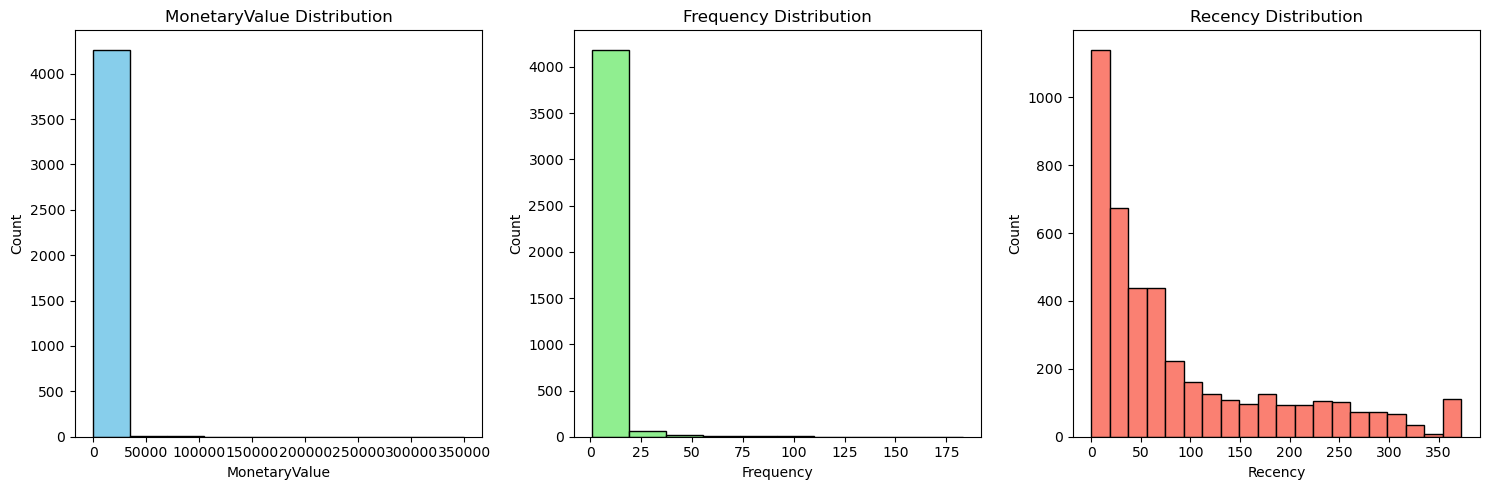

In [33]:
# Define plot configurations
metrics = [
    ('MonetaryValue', 'skyblue', 10),
    ('Frequency', 'lightgreen', 10),
    ('Recency', 'salmon', 20)
]

# Create figure
plt.figure(figsize=(15, 5))

# Loop through each metric and create a subplot
for i, (col, color, bins) in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    plt.hist(aggregated_df[col], bins=bins, color=color, edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Distribution Analysis:

[MonetaryValue] and [Frequency] Distributions: quite skewed, fell towards the first bin, only some outliers in the 2nd bin

[Recency] Distribution: looks similar to Poisson distribution > no real outliers

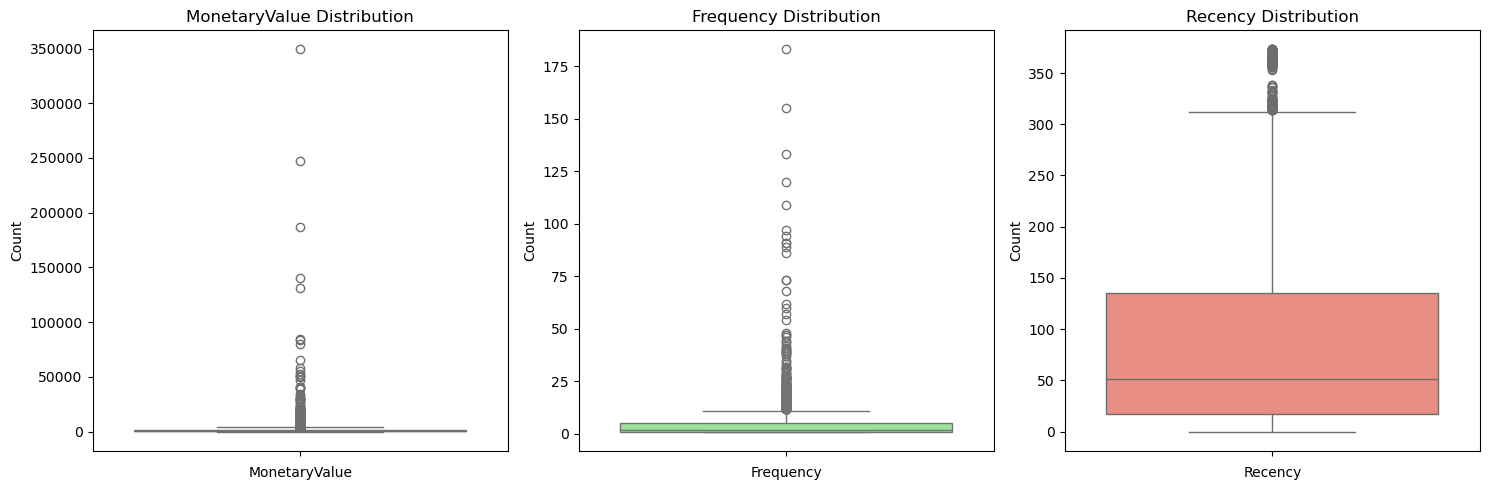

In [34]:
# To rigorously look at the distribution: Use box-plot
# Define plot configurations
metrics = [
    ('MonetaryValue', 'skyblue'),
    ('Frequency', 'lightgreen'),
    ('Recency', 'salmon')
]

# Create figure
plt.figure(figsize=(15, 5))

# Loop through each metric and create a subplot
for i, (col, color) in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(aggregated_df[col], color=color)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Outliers are clearly a problem here > should be dealt with. 

However, the naive method of : removing all outliers is not ideal, as for [MonetaryValue] for example, outliers are customers who spent a huge chunk of money in their purchases > client would really care about this

    ! Our strategy: separate these outliers for a separate analysis/ categorisation, 

    use the remaning data for K-means clustering

In [81]:
# Separate outliers:

M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1 # inner quartile range 

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q1 + 1.5*M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,737.00,737.00,737.00,737,737.00
mean,15152.34,8258.81,13.00,2010-11-05 15:00:32.645861632,33.93
min,12356.00,2408.96,1.00,2009-12-10 18:03:00,0.00
25%,13694.00,3033.88,6.00,2010-10-26 13:46:00,6.00
50%,15044.00,4144.44,9.00,2010-11-23 12:22:00,16.00
75%,16655.00,6798.72,14.00,2010-12-03 15:16:00,44.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1713.65,20086.34,15.87,NaN,48.95


**Notice**:

quantile() : 0.25: represent the 1st quarter, thus 1: the fourth quarter

    > However, can also be understood as percentile > quite confusing

Now, similar for [Frequency] and [Recency] values

In [36]:
# Separate outliers:

F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1 # inner quartile range 

frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"] > (F_Q1 + 1.5*F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,586.00,586.00,586.00,586,586.00
mean,15383.73,8636.42,16.16,2010-11-17 01:16:47.406143488,22.50
min,12417.00,97.40,8.00,2010-02-15 10:47:00,0.00
25%,13959.25,2545.39,9.00,2010-11-12 13:13:15,3.00
50%,15358.50,4093.52,11.00,2010-11-29 00:05:00,10.50
75%,16842.00,7057.96,16.00,2010-12-06 11:59:00,27.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,297.00
std,1693.52,22381.78,16.81,NaN,34.18


Now, extract the non-outliers data 

    > This is the one that we're gonna apply K-means clustering on

In [37]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) 
& (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3420.00,3420.00,3420.00,3420,3420.00
mean,15389.77,688.96,2.37,2010-08-27 20:45:48.105263104,103.69
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13919.75,252.34,1.00,2010-06-27 11:06:30,25.00
50%,15403.50,505.38,2.00,2010-10-06 15:41:00,64.00
75%,16872.50,986.84,3.00,2010-11-14 13:44:45,165.00
max,18287.00,2401.07,7.00,2010-12-09 20:01:00,373.00
std,1694.64,561.39,1.60,NaN,100.20


**Code Debunk**

index in (pandas) library: leverage this as: we want the aggregated_df records where the index values are NOT those that is in the outliers

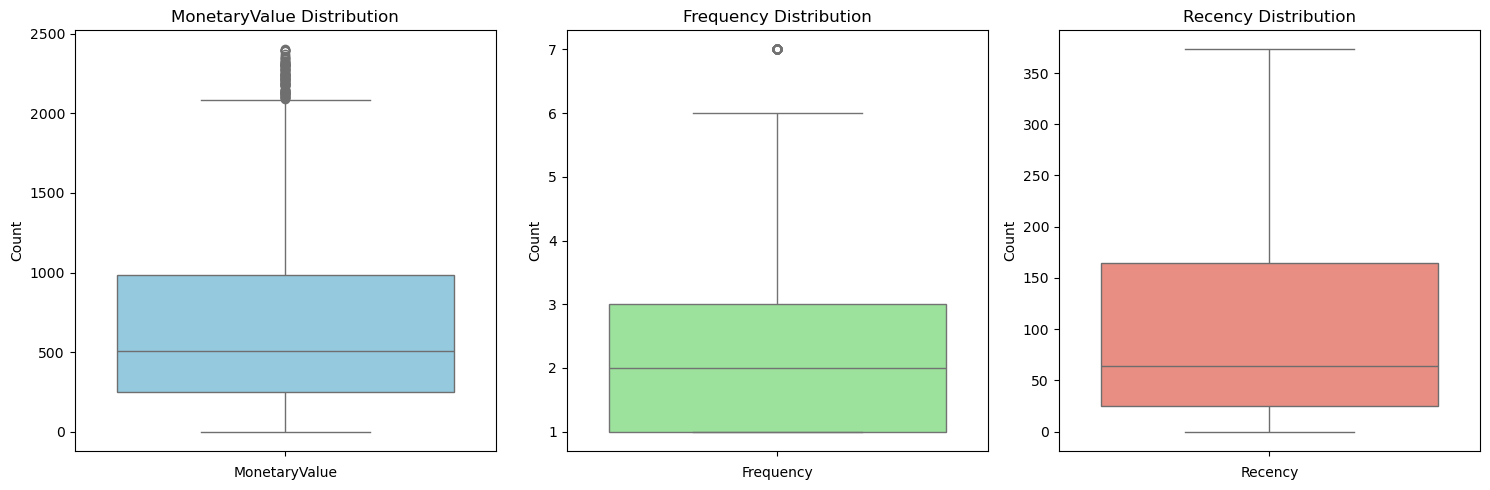

In [38]:
# To rigorously look at the distribution: Use box-plot
# Define plot configurations
metrics = [
    ('MonetaryValue', 'skyblue'),
    ('Frequency', 'lightgreen'),
    ('Recency', 'salmon')
]

# Create figure
plt.figure(figsize=(15, 5))

# Loop through each metric and create a subplot
for i, (col, color) in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(non_outliers_df[col], color=color)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Plot analysis**

Looks better now, although by strict definition, outliers still exist , but are lot more tolerable than before


Before K-means clustering: Do > > [Standard Scaling]

**Standard Scaling**

Transform: the features of the data: to have mean of 0 and standard deviation of 1, ensuring that each contributes equally to the analysis

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $z$ is the standardised value
- $x$ is the original
- $\mu$ is the mean of the feature
- $\sigma$ is the st.dev of the feature

!CAVEAT: 

This assumed: data is normally distributed >> not necessarily true for this dataset >> but still useful nonetheless

In [39]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data
# quirky bit from scikit.learn : even tho input is dataframe, output is Numpy array

array([[-0.92568919, -0.232806  ,  0.60200303],
       [ 1.13015144, -0.232806  , -1.01495786],
       [-0.83340475, -0.85874666, -0.30628982],
       ...,
       [-0.55576757, -0.85874666,  1.90954547],
       [ 0.99316785, -0.232806  ,  0.0729973 ],
       [ 2.86251554,  1.01907532, -0.86523926]])

In [40]:
# Convert scaled_data back to Dataframe

scaled_data_df = pd.DataFrame(
    scaled_data,
    index=non_outliers_df.index,
    columns=["MonetaryValue", "Frequency", "Recency"]
)

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.93,-0.23,0.60
1,1.13,-0.23,-1.01
2,-0.83,-0.86,-0.31
3,2.73,-0.23,-0.62
4,-0.69,-0.86,-0.94
...,...,...,...
4280,-0.08,2.27,-0.87
4281,-0.49,-0.86,-0.38
4282,-0.56,-0.86,1.91
4283,0.99,-0.23,0.07


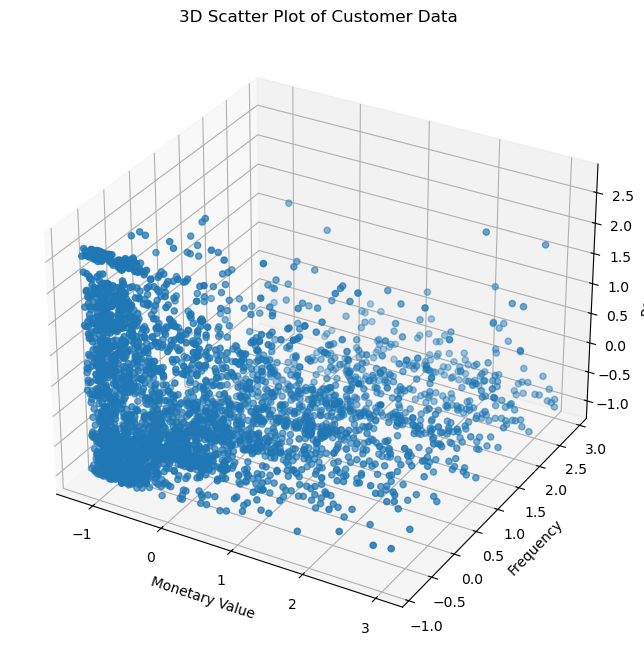

In [41]:
# Now, plot 3d map of the Three variables against one another 

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

Shape has NOT changed compared to pre-scaled data , however, the scales have changed and now are all comparable to one another

# K-Means Clustering

To: Determine the number of centroids, 

-  1. Ideal number: where the centroids are stablised, i.e. dont move around too much
-    2. The distance between a point to its centroid, i.e. *inertia*: is minimised

    Use: Elbow method

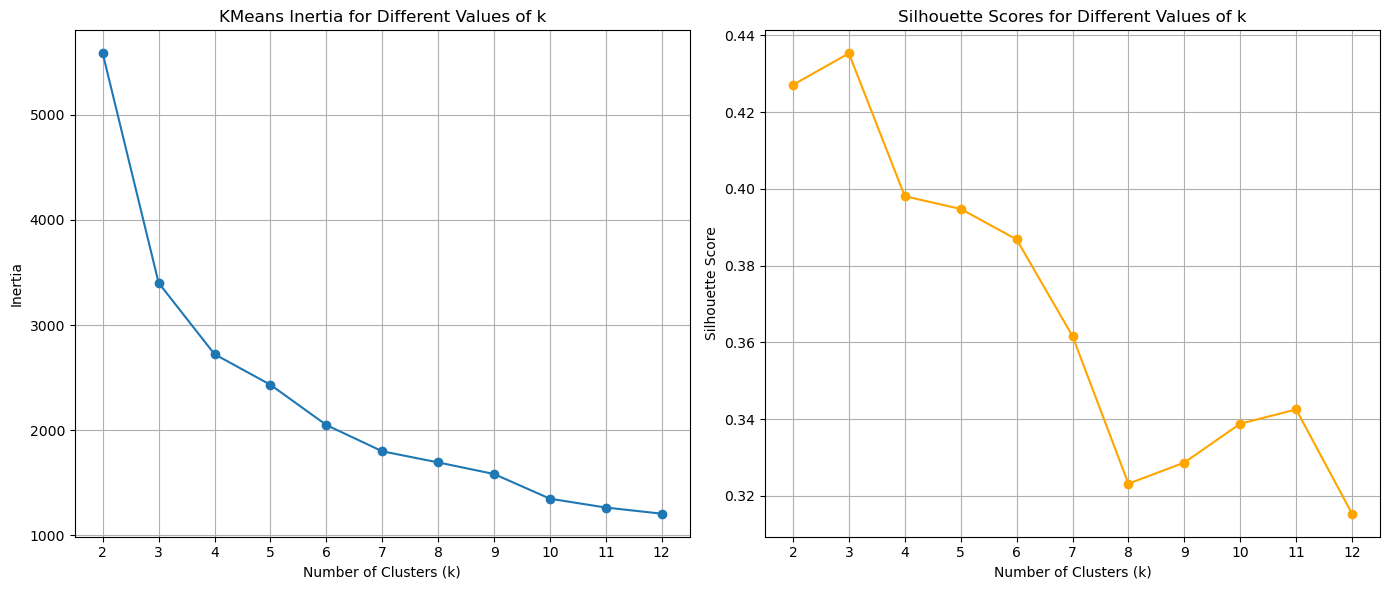

In [42]:
# upper limit to how many clusters we want:
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k +1) # range() only goes up to range - 1

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)

# random state: get repeated results since initial centroids are chosen randomly
# max_inter: go through 1000 iterations before the stop of choosing centroids
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(sil_score)


plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker= 'o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker= 'o', color = 'orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()


Between 4 and 5 clusters would be ideal, going further and choose more clusters would not make much difference

To choose rigorously between 4 or 5, use: Silhouete Score

**Silhouette Score**

$$
s(i) = \frac{b(i) - a(i)}{max(a(i), b(i))}
$$

Where:
- $s(i)$ is the silhouette score for a single sample $i$
- $a(i)$ is the average distance between $i$ and all other points in the same clusters
- $b(i)$ is the minimum average distance between $i$ and all points in the nearest clusters to which $i$ does not belong

The silhouette score range between $[1, -1]$ , higher values = more distinct clusters

Looking at the orange plot above, 4 clusters has higher `sill_score` than 5 

> ideally: choose 4

In [43]:
kmeans = KMeans(n_clusters = 4, random_state = 42, max_iter = 1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels #Show: for each entry , what cluster it belongs to

array([3, 0, 1, ..., 3, 0, 2])

In [44]:
# Create a new column in non_outliers_df, assign it as "Cluster"

non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_12596\3967906661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,3
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,1
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,2
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,1
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,3
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


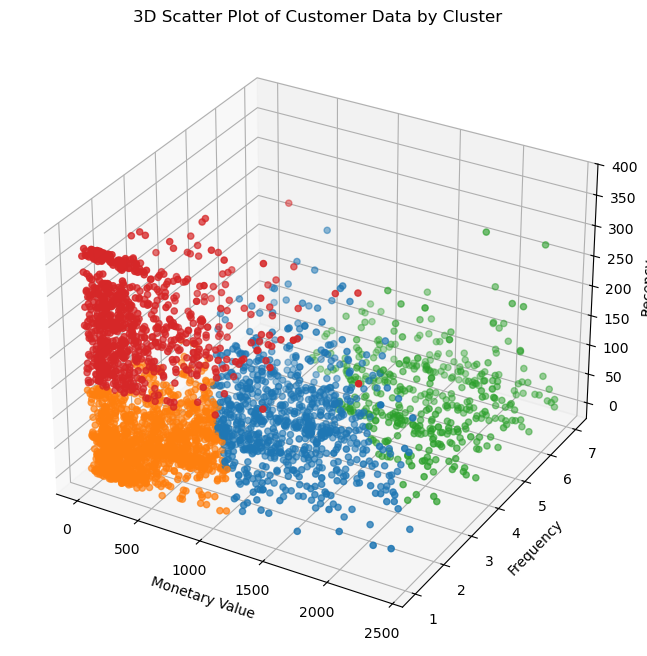

In [45]:
cluster_colors = {
    0: '#1f77b4',  # Blue
    1: '#ff7f0e',  # Orange
    2: '#2ca02c',  # Green
    3: '#d62728'  } # Red


colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    non_outliers_df['MonetaryValue'],
    non_outliers_df['Frequency'],
    non_outliers_df['Recency'],
    c=colors,  # Use mapped solid colors
    marker='o'
)

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()


Now that we know 4 cluster position within the 3D Map a have a certain sense of what each cluster might represent, 

Using a violin plot would help further explain each customer demographics based on these clusters

> Thus, easier to decide how to target these different groups effectively

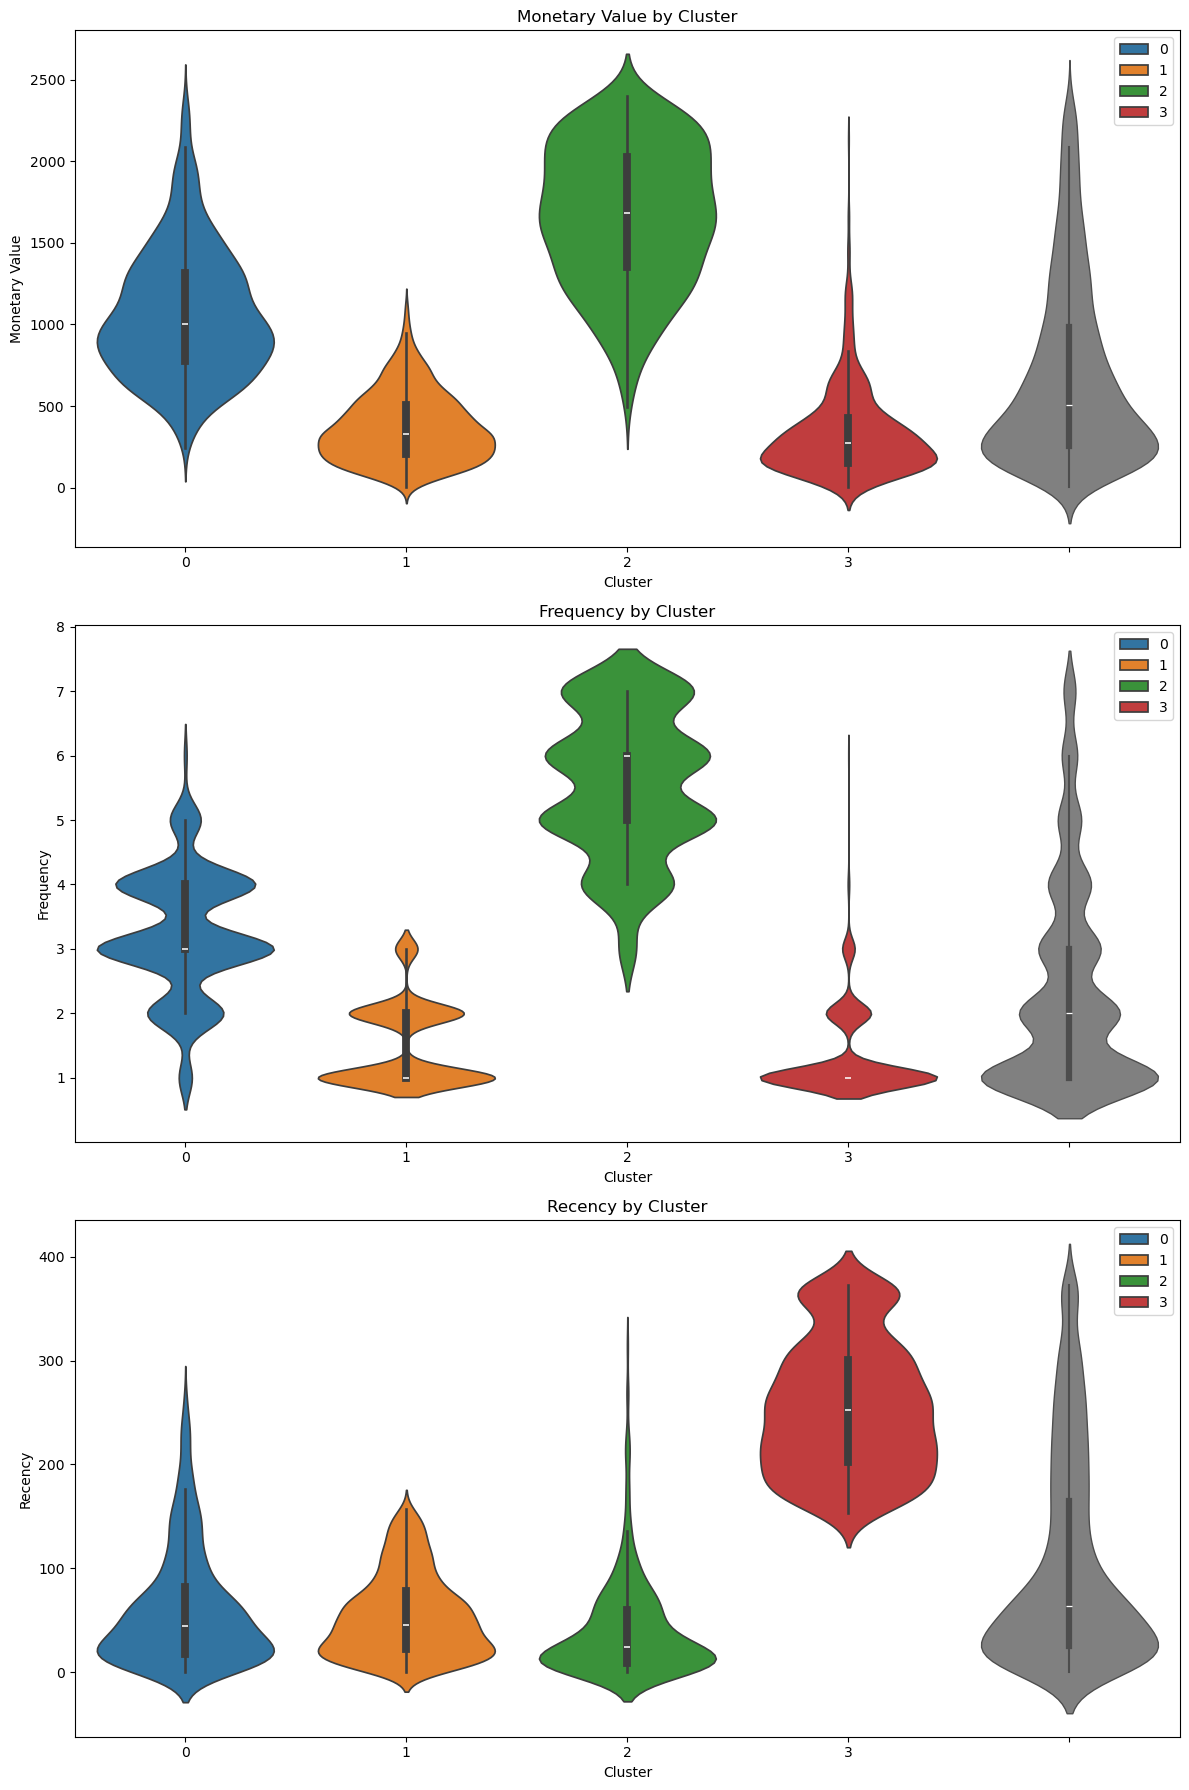

In [46]:
# Violin Plots:


plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

This present the most important part of this analysis: Customer Segmentation

4 groups:

- 1. Cluster 0 (Blue): **"Retain"**

Rationale : This group has: relatively spent high amount of money, good frequency, but those purchases are not always recent

Action: Encourage them to be active again with the client, i.e go in depth into what section of goods they have bought, has the client got rid of such items, or any other reasons that could have impacted their purchase

- 2. Cluster 1 (Orange): **"Engage"**
 
Rationle: These are customers who interacted with the brand very recently, hence explaining their recent purchases, low frequency (mostly 1 or 2 times), and low money spending. 

Action: Run more ad campaigns to remind them of the brand, send out mails or text messages asking for their feedbacks, etc.

- 3. Cluster 2 (Green): **"Reward"**
 
Rationale: These customers are loyal to the brand, spent the highest amount and spent very regularly, but have not interacted with the brand recently.

Action: Should start rewarding scheme immediately to draw back their attention, as these are the customers that drives the big part of the company financial growth.  \
        Could also run customer in-depth analysis to see why they have stopped purchasing recently

- 4. Cluster 3 (Red): **"Re-engage"**
 
Rationale: This group has the pattern of : low spending, low frequency, and have not purchased recently.

Action: Start running marketing ads to gain their attention, but could consider cutting this group to save cost. 

# Outliers Analysis:

*(Detected from: Data Cleaning)*

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q1 + 1.5*M_IQR))].copy()


#### Overlapping points: 

As saw earlier, some outliers from MonetaryValue, and Frequency, and Recency can be overlapped


    >> This essenstially is our "mannually" created 3 clusters

In [82]:
#!! MAIN CODE: .intersection()

overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

len(monetary_outliers_df)
len(overlap_indices)

monetary_outliers_df


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
8,12356.00,3126.25,3,2010-11-24 12:24:00,15
9,12357.00,11229.99,1,2010-11-16 10:05:00,23
10,12358.00,2519.01,3,2010-11-29 10:56:00,10
11,12359.00,2563.36,6,2010-10-10 11:16:00,60
25,12380.00,4782.84,4,2010-08-31 14:54:00,100
...,...,...,...,...,...
4239,18229.00,3526.81,10,2010-12-08 10:51:00,1
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41
4250,18245.00,3757.92,13,2010-11-25 16:52:00,14
4253,18251.00,21964.14,8,2010-09-20 13:26:00,80


In [79]:
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)

frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)

monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_and_frequency_outliers["MonetaryValue"].describe()

count                 458.00
mean                10547.01
std                 24988.80
min                  2414.18
25%                  3422.16
50%                  4908.86
75%                  8352.70
max                349164.35
Name: MonetaryValue, dtype: float64

In [63]:
# Using these three feature: Create 3 new clusters


# Create:  A NEW COLUMN called "Cluster" and assign values to it, also make sure these
# are not overidded, by index, by the other 3 clusters in K-means
monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

monetary_only_outliers

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
8,12356.00,3126.25,3,2010-11-24 12:24:00,15,-1
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
10,12358.00,2519.01,3,2010-11-29 10:56:00,10,-1
11,12359.00,2563.36,6,2010-10-10 11:16:00,60,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
...,...,...,...,...,...,...
4131,18069.00,2487.99,6,2010-11-21 15:56:00,18,-1
4149,18094.00,3374.22,6,2010-09-19 14:03:00,81,-1
4183,18145.00,2756.24,7,2010-11-22 12:55:00,17,-1
4205,18178.00,4512.93,7,2010-11-02 17:24:00,37,-1


In [68]:
# UNION these three together:

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers,monetary_and_frequency_outliers ])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
8,12356.00,3126.25,3,2010-11-24 12:24:00,15,-1
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
10,12358.00,2519.01,3,2010-11-29 10:56:00,10,-1
11,12359.00,2563.36,6,2010-10-10 11:16:00,60,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
...,...,...,...,...,...,...
4239,18229.00,3526.81,10,2010-12-08 10:51:00,1,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3
4250,18245.00,3757.92,13,2010-11-25 16:52:00,14,-3
4253,18251.00,21964.14,8,2010-09-20 13:26:00,80,-3


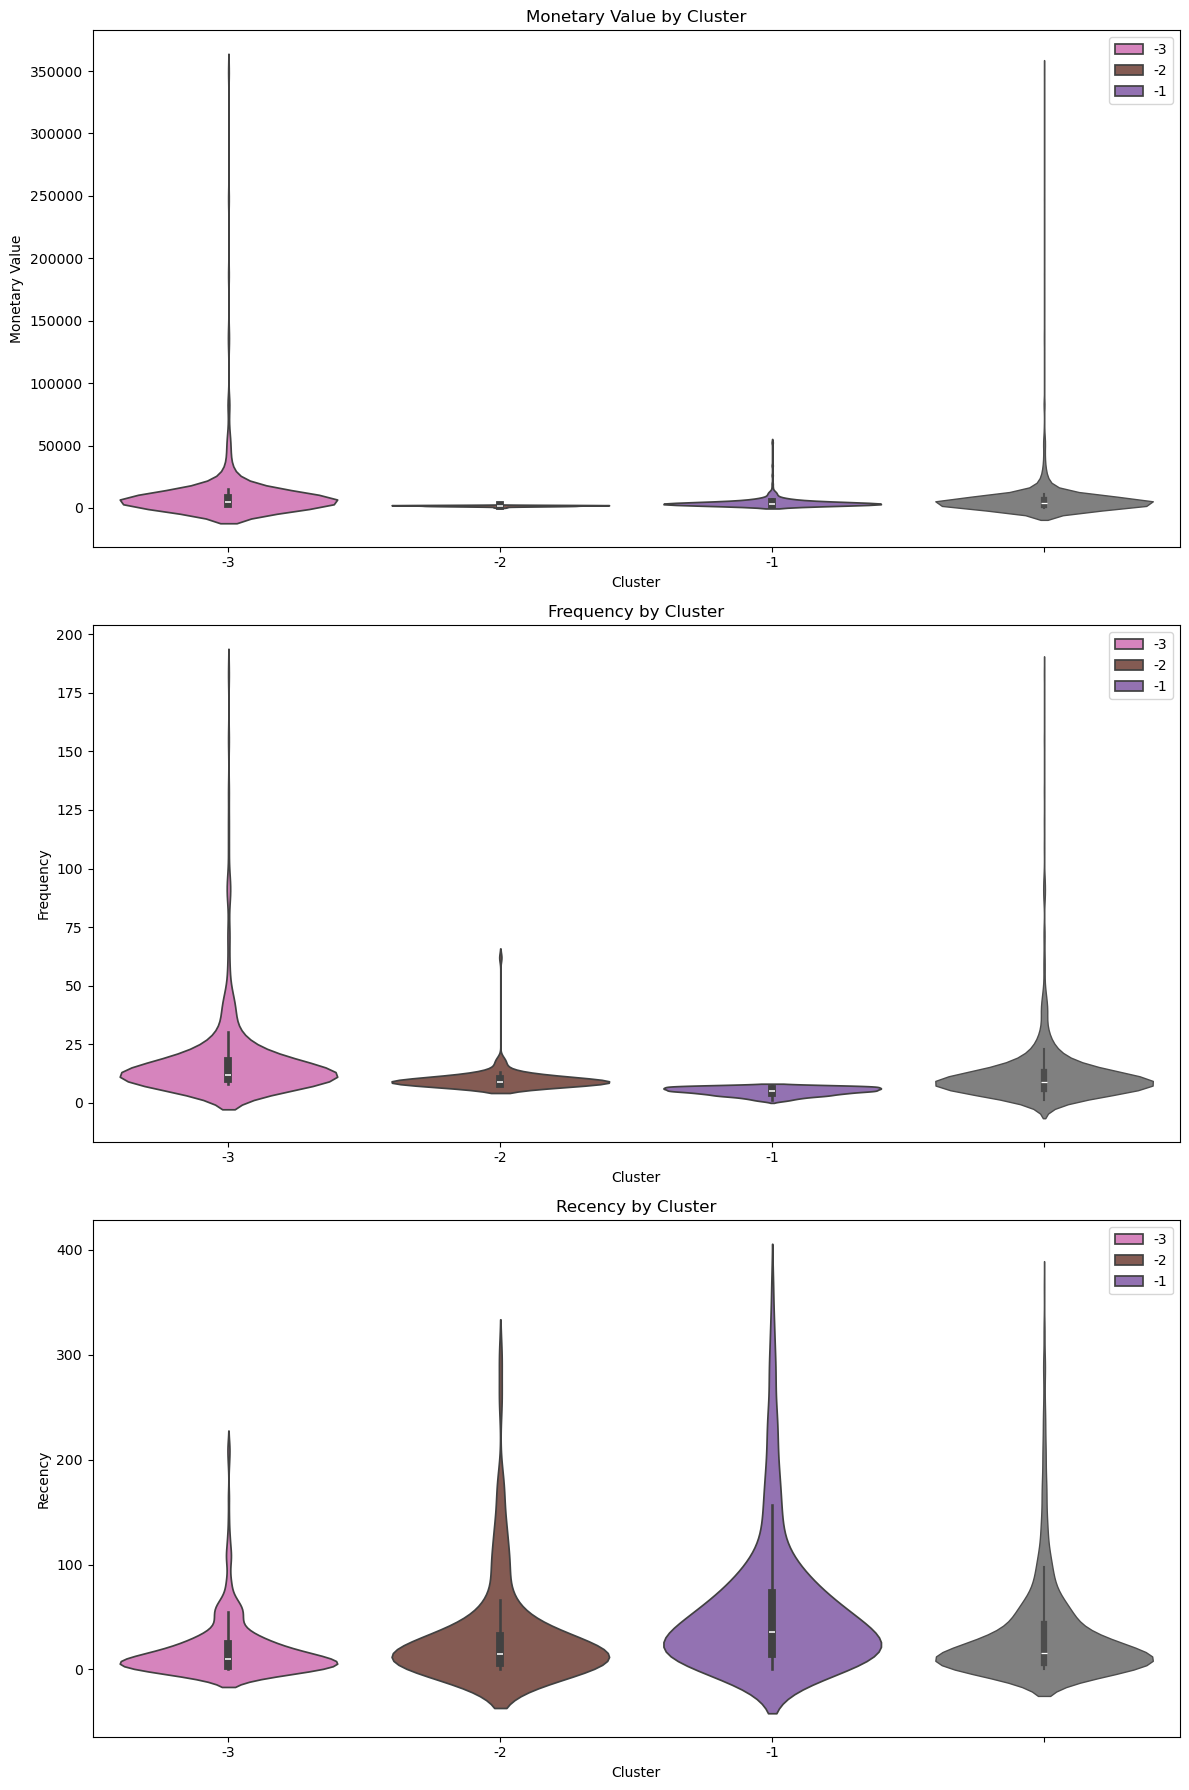

In [72]:
# Violin Plots:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

### Analysis: 

- Cluster -1 (Purple cluster): **PAMPER**
    - **Characteristics**:
      1. High spending level, but very low frequency and have not purchased for a long time
      2. These customers could be: either drawn into a sale campaing done by the company before, or found a retailer with a better competitive prices (if they are wholesalers customers). Or just individuals with large spending capacity.
    - **Action**:
       1. Conduct a price investigation to see if there's any place for possible price reduction.
       2. Offer luxury offers cater to their spending capacity (individual customers)


- Cluster -2 (Brown cluster) : **UPSELL**
    - **Characterisitcs:** Frequent buyers who spend less per purchase. These customers are quite active but might need a kick to encourage more spending
    - **Action:** Promote loyalty programmes or bundles deals >> Encourage higher spending per visit.


- Cluster -3 (Pink cluster): **DELIGHT**
    - **Characteristics:** The most valuable outliers, customers who spent the most, with very frequent purchases and very recent as well. These customers should be encouraged to stay with the company for as long as possible.
    - **Action:** Develop VIP programmes or exclusive offers to maintain their loyalty and enccourage continued engagement.

In [83]:
cluster_labels = {
    0: "RETAIN",
    1: "ENGAGE",
    2: "REWARD",
    3: "RE-ENGAGE",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,3
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,1
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1
...,...,...,...,...,...,...
4239,18229.00,3526.81,10,2010-12-08 10:51:00,1,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3
4250,18245.00,3757.92,13,2010-11-25 16:52:00,14,-3
4253,18251.00,21964.14,8,2010-09-20 13:26:00,80,-3


In [89]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,3,RE-ENGAGE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,1,ENGAGE
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1,ENGAGE
...,...,...,...,...,...,...,...
4239,18229.00,3526.81,10,2010-12-08 10:51:00,1,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT
4250,18245.00,3757.92,13,2010-11-25 16:52:00,14,-3,DELIGHT
4253,18251.00,21964.14,8,2010-09-20 13:26:00,80,-3,DELIGHT


### Summary Visualisation:

Compare the 7 clusters, from our mannually created, and from K-Means Clustering, specifically the mean of the key features:

1. MonetaryValue
2. Frequency
3. Recency

Number of customers in each clusters are also presented for a transparent image of our analysis.

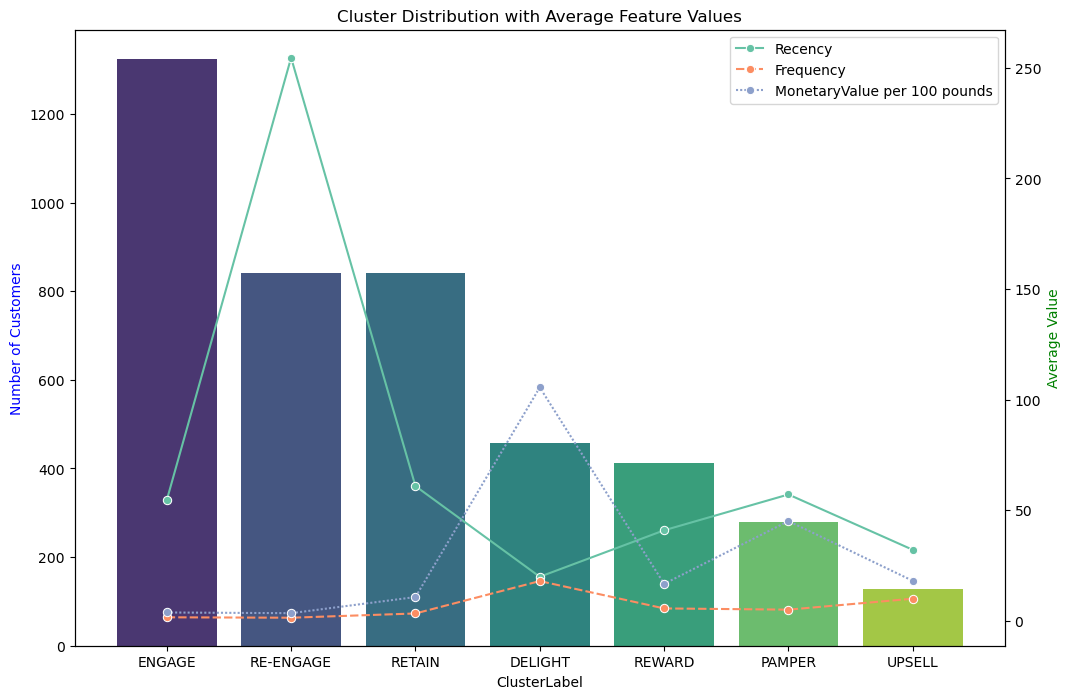

ENGAGE: 1324 customers
RE-ENGAGE: 842 customers
RETAIN: 842 customers
DELIGHT: 458 customers
REWARD: 412 customers
PAMPER: 279 customers
UPSELL: 128 customers


In [97]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts() # number of values in each cluster
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx() # Add: A secondary axis for average value of each feature

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o') # Line representing the mean
ax2.set_ylabel('Average Value', color='g')

plt.show()


for label, count in cluster_counts.items():
    print(f"{label}: {count} customers")

#### Code Analysis:

index() return on cluster_counts are : "ClusterLabel".

Reason:
When you access .index on the result of .value_counts(), you get the labels (ENGAGE, etc.), because those are the keys (index) of the resulting Series.


Also: Divide the MonetaryValue by 100 pounds as the extreme range within this feature caused the plot to look quite squashed >> division makes the plot a bit clearer

#### Plot Analysis:

- Context: ENGAGE, RE-ENGAGE, RETAIN, AND REWARD : from K-Means Clustering (non-outliers data)

DELIGHT, PAMPER, and UPSELL are from outliers data .

    However, the behaviours from these two categories are not neccesarily distncti. As:
        outiers are identified as extreme values within each feature, it does not say anything specific about the customer's spending behaviours. Some groups might even share correlation.

- Can see the trend within each group,

- ENGAGE by far has the largest number of customers,
> Main Focus

- Spikes in each feature: DELIGHT - both MonetaryValue and Frequency, RE-ENGAGE - Recency
